In [5]:
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical

In [6]:
(train_images, train_labels),(test_images,test_labels) = cifar10.load_data()

In [7]:
print(len(train_images))
print(len(test_images))
print(train_images[0].shape)

50000
10000
(32, 32, 3)


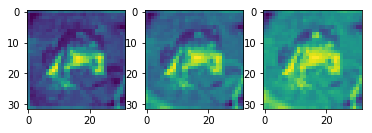

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
_, axarr = plt.subplots(1,3)
axarr[0].imshow(train_images[0,:,:,2])
axarr[1].imshow(train_images[0,:,:,1])
axarr[2].imshow(train_images[0,:,:,0])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

dataAugmentor_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range = 0.1,
    height_shift_range= 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

dataAugmentor_validation = ImageDataGenerator(
    rescale = 1./255,
)

In [20]:
from math import ceil
from keras import layers
from keras import models
from keras import optimizers

steps_per_epoch = ceil(len(train_images)*.8/64)

validation_steps = ceil(len(train_images)*.2/64)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True)

train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)
opt = optimizers.RMSprop(lr=0.001)

modelHistories = []
modelList = []

In [25]:
for train,test in kfold.split(train_images,train_labels):
    
    model = models.Sequential()
    
    model.add(layers.Conv2D(32,(3,3), padding="same",activation='relu',input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(64,(3,3), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(128,(3,3), padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3),padding="same", activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(10,activation="softmax"))
    
    dataGenTrain = dataAugmentor_train.flow(
        x=train_images[train],
        y=train_labels_categorical[train],
        batch_size = 64
    )

    dataGenValidation = dataAugmentor_validation.flow(
        x=train_images[test],
        y=train_labels_categorical[test],
        batch_size = 64
    )
    
    model.compile(
      loss="categorical_crossentropy",
      optimizer=opt,
      metrics=['acc']
    )
    
    history = model.fit_generator(
      dataGenTrain,
      steps_per_epoch,
      epochs=50,
      validation_data = dataGenValidation,
      validation_steps = validation_steps
    )

    modelHistories.append(history)
    modelList.append(model)

Epoch 1/50
625/625 [==============================] - 506s 810ms/step - loss: 1.8659 - acc: 0.3638 - val_loss: 1.3809 - val_acc: 0.5002
Epoch 2/50
625/625 [==============================] - 530s 848ms/step - loss: 1.3970 - acc: 0.4998 - val_loss: 1.7541 - val_acc: 0.4288
Epoch 3/50
625/625 [==============================] - 535s 855ms/step - loss: 1.2464 - acc: 0.5571 - val_loss: 1.2107 - val_acc: 0.5804
Epoch 4/50
625/625 [==============================] - 571s 914ms/step - loss: 1.1377 - acc: 0.5958 - val_loss: 1.4555 - val_acc: 0.5537
Epoch 5/50
625/625 [==============================] - 543s 869ms/step - loss: 1.0746 - acc: 0.6218 - val_loss: 1.0105 - val_acc: 0.6601
Epoch 6/50
625/625 [==============================] - 451s 722ms/step - loss: 1.0160 - acc: 0.6450 - val_loss: 1.3010 - val_acc: 0.5789
Epoch 7/50
625/625 [==============================] - 444s 711ms/step - loss: 0.9795 - acc: 0.6592 - val_loss: 0.9067 - val_acc: 0.6858
Epoch 8/50
625/625 [============================

Epoch 11/50
625/625 [==============================] - 440s 703ms/step - loss: 0.8751 - acc: 0.6985 - val_loss: 1.1115 - val_acc: 0.6718
Epoch 12/50
625/625 [==============================] - 446s 714ms/step - loss: 0.8692 - acc: 0.7014 - val_loss: 0.7886 - val_acc: 0.7286
Epoch 13/50
625/625 [==============================] - 439s 703ms/step - loss: 0.8476 - acc: 0.7071 - val_loss: 0.7215 - val_acc: 0.7508
Epoch 14/50
625/625 [==============================] - 439s 703ms/step - loss: 0.8360 - acc: 0.7116 - val_loss: 0.7903 - val_acc: 0.7323
Epoch 15/50
625/625 [==============================] - 439s 703ms/step - loss: 0.8222 - acc: 0.7145 - val_loss: 0.7531 - val_acc: 0.7456
Epoch 16/50
625/625 [==============================] - 439s 703ms/step - loss: 0.8118 - acc: 0.7209 - val_loss: 0.8997 - val_acc: 0.7044
Epoch 17/50
625/625 [==============================] - 440s 703ms/step - loss: 0.8005 - acc: 0.7246 - val_loss: 0.7739 - val_acc: 0.7538
Epoch 18/50
625/625 [====================

Epoch 21/50
625/625 [==============================] - 444s 710ms/step - loss: 0.7515 - acc: 0.7409 - val_loss: 0.7311 - val_acc: 0.7552
Epoch 22/50
625/625 [==============================] - 467s 747ms/step - loss: 0.7430 - acc: 0.7460 - val_loss: 0.7909 - val_acc: 0.7439
Epoch 23/50
625/625 [==============================] - 499s 798ms/step - loss: 0.7277 - acc: 0.7510 - val_loss: 0.8042 - val_acc: 0.7399
Epoch 24/50
625/625 [==============================] - 447s 715ms/step - loss: 0.7211 - acc: 0.7519 - val_loss: 0.8243 - val_acc: 0.7339
Epoch 25/50
625/625 [==============================] - 457s 731ms/step - loss: 0.7144 - acc: 0.7531 - val_loss: 0.8016 - val_acc: 0.7590
Epoch 26/50
625/625 [==============================] - 508s 813ms/step - loss: 0.7016 - acc: 0.7576 - val_loss: 0.8256 - val_acc: 0.7446
Epoch 27/50
625/625 [==============================] - 460s 736ms/step - loss: 0.6953 - acc: 0.7647 - val_loss: 0.7272 - val_acc: 0.7725
Epoch 28/50
625/625 [====================

Epoch 31/50
625/625 [==============================] - 446s 713ms/step - loss: 0.6622 - acc: 0.7703 - val_loss: 0.6479 - val_acc: 0.7885
Epoch 32/50
625/625 [==============================] - 479s 767ms/step - loss: 0.6586 - acc: 0.7728 - val_loss: 0.6617 - val_acc: 0.7840
Epoch 33/50
625/625 [==============================] - 469s 751ms/step - loss: 0.6448 - acc: 0.7760 - val_loss: 0.6988 - val_acc: 0.7796
Epoch 34/50
625/625 [==============================] - 445s 712ms/step - loss: 0.6355 - acc: 0.7808 - val_loss: 0.6946 - val_acc: 0.7818
Epoch 35/50
625/625 [==============================] - 445s 712ms/step - loss: 0.6303 - acc: 0.7812 - val_loss: 0.6889 - val_acc: 0.7806
Epoch 36/50
625/625 [==============================] - 444s 711ms/step - loss: 0.6316 - acc: 0.7810 - val_loss: 0.7942 - val_acc: 0.7644
Epoch 37/50
625/625 [==============================] - 444s 711ms/step - loss: 0.6199 - acc: 0.7832 - val_loss: 0.6830 - val_acc: 0.7779
Epoch 38/50
625/625 [====================

Epoch 41/50
625/625 [==============================] - 447s 715ms/step - loss: 0.6048 - acc: 0.7923 - val_loss: 0.6681 - val_acc: 0.7934
Epoch 42/50
625/625 [==============================] - 443s 710ms/step - loss: 0.6060 - acc: 0.7898 - val_loss: 0.7134 - val_acc: 0.7726
Epoch 43/50
625/625 [==============================] - 441s 706ms/step - loss: 0.6043 - acc: 0.7917 - val_loss: 0.5354 - val_acc: 0.8207
Epoch 44/50
625/625 [==============================] - 442s 707ms/step - loss: 0.5981 - acc: 0.7935 - val_loss: 0.6451 - val_acc: 0.7933
Epoch 45/50
625/625 [==============================] - 442s 707ms/step - loss: 0.5992 - acc: 0.7935 - val_loss: 0.5717 - val_acc: 0.8086
Epoch 46/50
625/625 [==============================] - 442s 707ms/step - loss: 0.5873 - acc: 0.7967 - val_loss: 0.6890 - val_acc: 0.7850
Epoch 47/50
625/625 [==============================] - 442s 707ms/step - loss: 0.5891 - acc: 0.7936 - val_loss: 0.7966 - val_acc: 0.7513
Epoch 48/50
625/625 [====================

In [110]:
for i,model in enumerate(modelList):
    path = 'Attempt_4_1_'+str(i)+'.h5'
    print(path)
    model.save(path)

Attempt_4_1_0.h5
Attempt_4_1_1.h5
Attempt_4_1_2.h5
Attempt_4_1_3.h5
Attempt_4_1_4.h5


In [97]:
import numpy as np
totalAcc = np.zeros(50)
totalLoss = np.zeros(50)
totalAccVal = np.zeros(50)
totalLossVal = np.zeros(50)

for i in np.arange(4):
    acc = modelHistories[i].history['acc']
    totalAcc += acc
    loss = modelHistories[i].history['loss']
    totalLoss += loss
    accVal = modelHistories[i].history['val_acc']
    totalAccVal += accVal
    lossVal = modelHistories[i].history['val_loss']
    totalLossVal += lossVal
    

meanAcc = totalAcc/5
meanLoss = totalLoss/5
meanAccVal = totalAccVal/5
meanLossVal = totalLossVal/5

In [98]:
hist = history.history

acc = meanAcc
val_acc = meanAccVal

loss = meanLoss
val_loss = meanLossVal

epochs = range(1,len(acc)+1)

Train Accuracy: 
0.63993
Validation Acuracy: 
0.6370800000000001


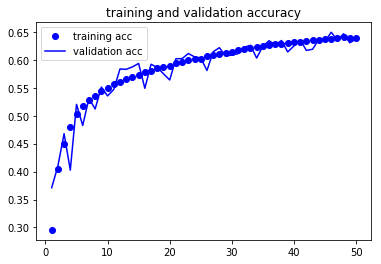

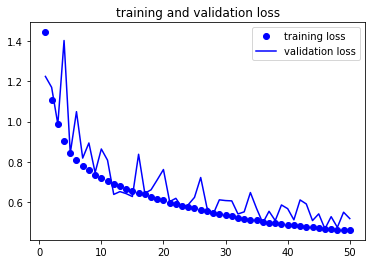

In [101]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

print("Train Accuracy: ")
print(acc[-1])
print("Validation Acuracy: ")
print(val_acc[-1])
plt.show()

In [105]:
lossList=[]
accList=[]
for model in modelList:
    loss, acc = model.evaluate(
    x=test_images/255.,
    y=test_labels_categorical
    )
    lossList.append(loss)
    accList.append(acc)


10000/10000 [==============================] - 27s 3ms/step


In [106]:
lossTot = 0
accTot = 0
for i in np.arange(0,len(lossList)):
    lossTot += lossList[i]
    accTot += accList[i]

loss = lossTot/5
acc = accTot/5

print("Loss: ")
print(loss)
print("Accuracy: ")
print(acc)

Loss: 
0.6466472980737686
Accuracy: 
0.79648


In [112]:
import numpy as np
import tensorflow as tf
from keras.models import load_model



In [113]:
def get_examples(start,end,height = 10, width = 20):
    class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    numImages = np.arange(start,end)
    predictions = []
    categories = []
    for i in numImages:
        #prediction from model for first 5 images
        predictions.append(np.argmax(model.predict(x=test_images[i].reshape(1,32,32,3)/255.)))
        categories.append(class_names[predictions[-1]])

    #create subplots
    (f, axs) = plt.subplots(1, len(predictions), sharey=True)
    f.set_figheight(height)
    f.set_figwidth(width)

    guessNumber = 0
    for i in numImages:
        guess = categories[guessNumber]
        actual = class_names[test_labels[i][0]]
        actual = actual
        xpos = (10-len("Actual : "+ actual)/2)

        if(actual == guess):
            color = "green"
        else:
            color="red"

        axs[guessNumber].imshow(test_images[i])
        axs[guessNumber].set_title("Guess : " + categories[guessNumber],color=color)

        axs[guessNumber].text(xpos,40, "Actual : " + actual,color=color)
        guessNumber += 1
    f.show()

C:\Users\gabal\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


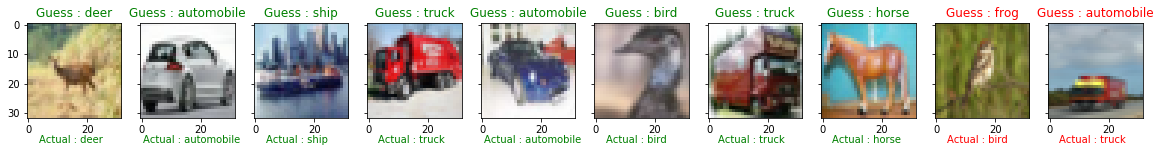

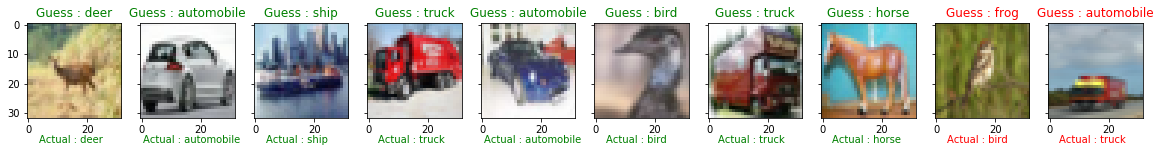

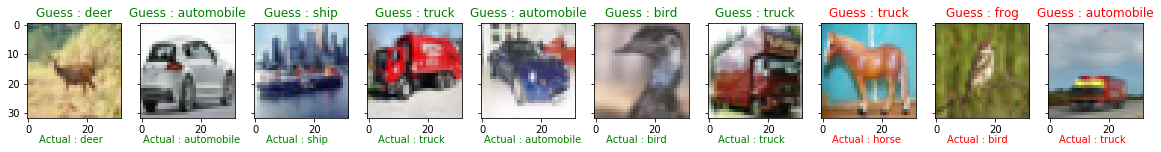

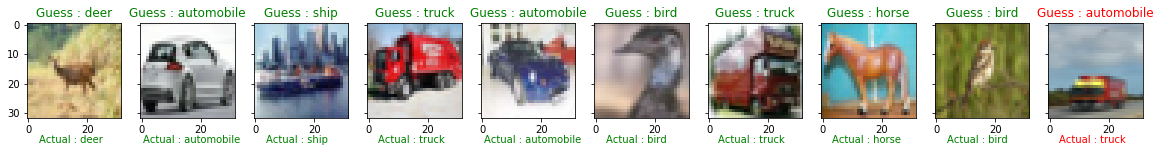

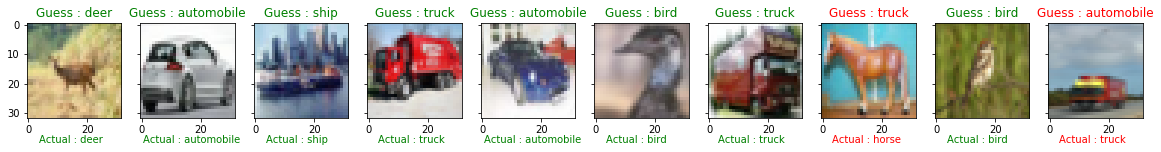

In [115]:
for i,model in enumerate(modelList):
    path = "Attempt_4_1_"+str(i)+".h5"
    model = load_model(path)
    get_examples(130,140,20,20)
